In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [530]:
df=pd.read_csv("C:/Users/marpi/Downloads/scr-dataset.csv")

In [531]:
df.head()

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438


In [532]:
df.info

<bound method DataFrame.info of         x         y
0     1.0  1.750768
1     1.1  1.699704
2     1.2  1.607502
3     1.3  1.479060
4     1.4  1.320438
..    ...       ...
435  44.5  1.354955
436  44.6  1.523446
437  44.7  1.648505
438  44.8  1.727490
439  44.9  1.759403

[440 rows x 2 columns]>

In [533]:
df.isnull().mean()

x    0.0
y    0.0
dtype: float64

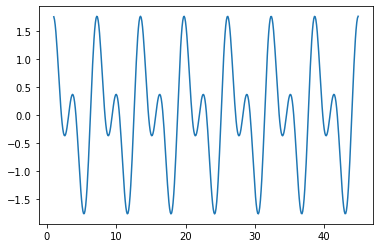

In [534]:
plt.plot(df["x"],df["y"])

In [535]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [536]:
X=df.drop("y",axis=1)
Y=df["y"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [537]:
model=DecisionTreeRegressor(max_depth=100)

In [538]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100)

In [539]:
from sklearn.metrics import mean_squared_error
print("The mean squared error is :",mean_squared_error(model.predict(x_test),y_test))

The mean squared error is : 0.029096833370728804


In [540]:
model.predict(pd.DataFrame([50]))

array([1.7594026])

In [541]:
print("The prediction of the model at y=50 is :",model.predict(pd.DataFrame([50])))

The prediction of the model at y=50 is : [1.7594026]


In [542]:
pd.DataFrame(model.predict(x_test),y_test)

,0
y,
-1.757024,-1.751026
0.123359,0.025646
0.271261,0.463868
-1.610444,-1.705531
1.443653,1.591051
...,...
-0.248694,-0.540392
0.296818,0.345708
1.611492,1.471453


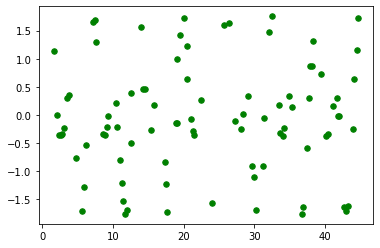

In [543]:
plt.scatter(x_test,model.predict(x_test),label= "stars", color= "green",s=30)

As we can see the above model is overfitted.

In [544]:
#method 2

  In this method the feature i.e the x value is normalized in between 1 to 7.2.\
  This is done beacause, from the plot above we can notice that the graph is periodic.\
  so all the x values are changed into values in between 1 and 7.2 as it is the base period.\
  This is done to improve the performance of the model.

In [545]:
df["x"][df["x"]>=7.2]=df["x"][df["x"]>=7.2].apply(lambda x: (x-7.2)%6.3 +1 )
df["x"]

0      1.0
1      1.1
2      1.2
3      1.3
4      1.4
      ... 
435    6.8
436    6.9
437    7.0
438    7.1
439    7.2
Name: x, Length: 440, dtype: float64

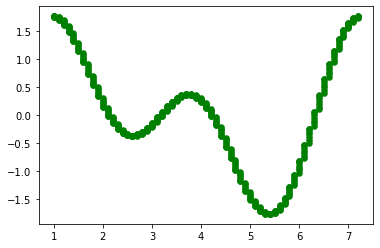

In [546]:
plt.scatter(df["x"],df["y"],label= "stars", color= "green",s=30)

In [547]:
from sklearn.model_selection import train_test_split

In [548]:
X=df.drop("y",axis=1)
Y=df["y"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [549]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [550]:
from sklearn.metrics import mean_squared_error
print("The mean squared error is :",mean_squared_error(model.predict(x_test),y_test))

The mean squared error is : 0.0025125196633833443


In [551]:
pd.DataFrame(model.predict(x_test),y_test)

,0
y,
0.168988,0.216411
-1.201889,-1.282524
0.360243,0.366793
-1.027139,-0.886484
-1.504183,-1.438791
...,...
-0.345385,-0.356418
-0.183331,-0.125630
1.706166,1.704503


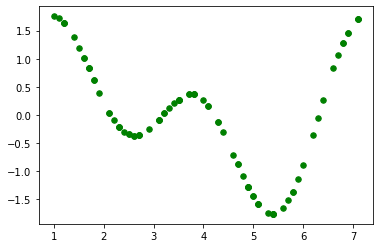

In [552]:
plt.scatter(x_test,model.predict(x_test),label= "stars", color= "green",s=30)

In [553]:
model.predict(pd.DataFrame([(50-7.2)%6.3 +1]))

array([-0.88648371])

In [554]:
print("The prediction of the model at y=50 is :",model.predict(pd.DataFrame([(50-7.2)%6.3 +1])))

The prediction of the model at y=50 is : [-0.88648371]


In [555]:
# The MSE of this model is decreased further by feature scaling.

The MSE of this model is much better than the first model and the predicted value of y at x=50 is -0.88648371.
